In [73]:
#Get the data from 
#https://www.kaggle.com/datasets/andreazzini/international-airline-passengers?resource=download&select=international-airline-passengers.csv

#Tutorial on youtube
#https://www.youtube.com/watch?v=0fWa9-Vj89g

In [74]:
#import functions
import pandas as pd
import os
import matplotlib_inline



In [75]:
#set working directory
os.chdir("/Users/nealarohner/Desktop/test/data")
#load data
fname = "international-airline-passengers.csv"
data=pd.read_csv(fname)
data.head() #returns the first 5 rows of the df

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [76]:
data.isnull().sum( ) #prints the nan  sum of nan values?



Month                                                                             0
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    1
dtype: int64

In [77]:
#delete last row
data=data.iloc[:-1, :] 
data.isnull().sum()


Month                                                                             0
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    0
dtype: int64

In [78]:
data.dtypes

Month                                                                              object
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    float64
dtype: object

In [79]:
#change data type from str to datetime; more suitable for operations
#data['Month']=pd.to_datetime(data['Month']) 
data.Month= data.Month.astype("datetime64[ns]")
data= data.rename(columns={"International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60"
: "Airpassengers"}) #change column name
data.Airpassengers= data.Airpassengers.astype(int)
data.head()

,Month,Airpassengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [80]:
data.dtypes

Month            datetime64[ns]
Airpassengers             int64
dtype: object

In [81]:
data.Month.dt.year.head()

0    1949
1    1949
2    1949
3    1949
4    1949
Name: Month, dtype: int64

In [82]:
data=data.set_index("Month")
data.head()

,Airpassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

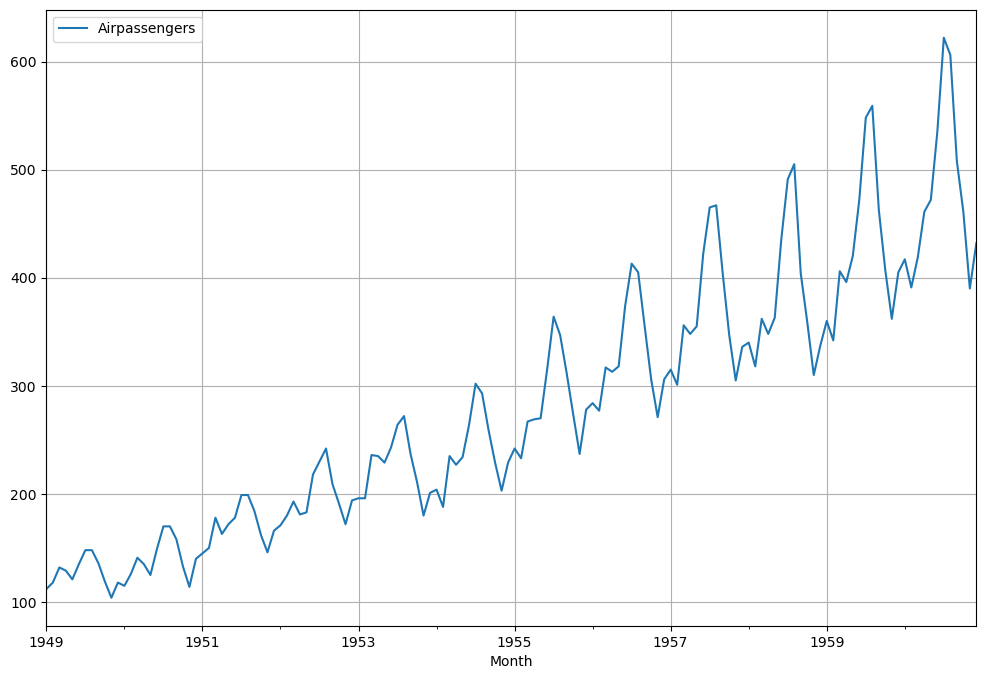

In [83]:
%matplotlib inline
data.plot(grid="on")

In [ ]:
#Observe seasonal changes by only looking at a certain timepoint
from datetime import datetime
start_date= datetime(1959, 1, 1)
end_date=datetime(1960, 12, 1)
data[(start_date <= data.index) & (data.index <= end_date)].plot(grid="on")

In [ ]:
from unicodedata import decomposition
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data, model = "additive")
fig = decomposition.plot()

In [86]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=[12.0, 8.0] # double up default plot size

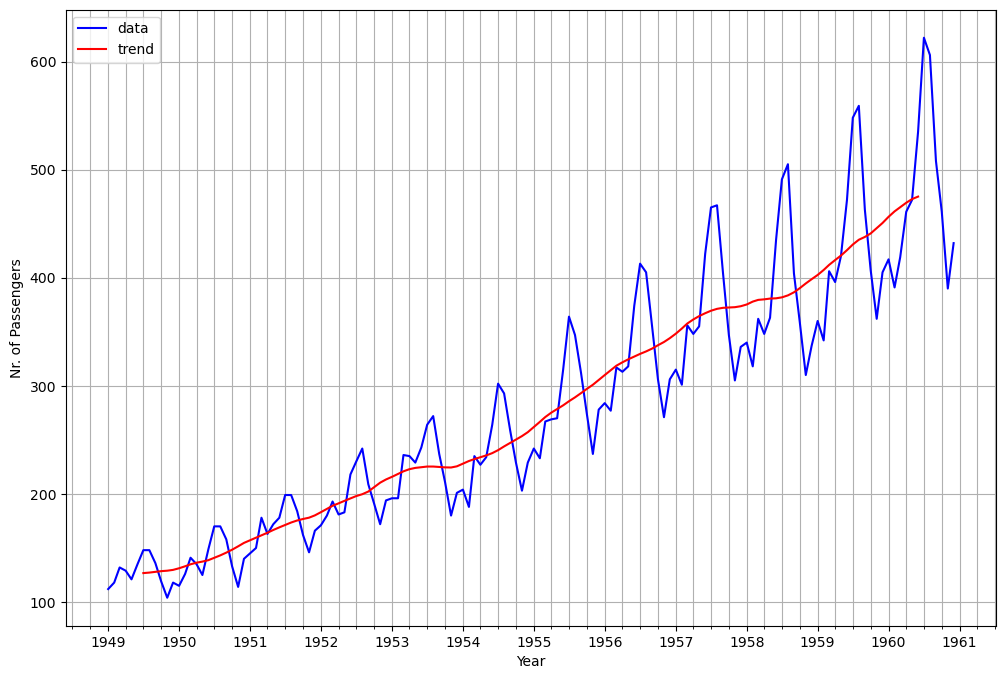

In [129]:
from re import X
from tkinter import Y
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax =plt.subplots() #https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python

#grid settings
ax.grid(True)
year = mdates.YearLocator(month=1)
year_format = mdates.DateFormatter("%Y")
month_format = mdates.DateFormatter("%m")
month = mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which="minor")
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
#add label
plt.xlabel("Year")
plt.ylabel("Nr. of Passengers")
#add legend
plt.plot(data , c="blue", label="data")
plt.plot(decomposition.trend, c="red", label="trend")
plt.legend()
# plt.show()